# UNDERFITTING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import openpyxl
import datetime


In [2]:
runner = pd.read_csv('runner.csv', sep='\t')
visits = pd.read_csv('visits.csv', sep='\t')
imc = pd.read_csv('imc.csv', sep='\t')

In [3]:
runner
#mostra o tempo de corrida e frequência cardiaca após correr esse tempo

,running_time,heartbeat
0,34.05,150
1,34.12,154
2,34.13,152
3,34.72,144
4,35.37,143
5,35.57,146
6,35.57,148
7,35.72,152
8,35.73,146
9,36.17,138


In [4]:
# O MEU X = RUNNING TIME E Y SERÁ HEARTBART
# Predizer

# Y = B0 + B1 * x1 + E

# fit_intercept=False - mata a constante B0

model = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)
                                                          # Quando a função recebe o X, cópia para não modificar a original

In [5]:
# criar as variavéis

x = runner['running_time'].to_numpy().reshape(-1,1)
y = runner['heartbeat'].to_numpy()
model.fit(x,y)

LinearRegression()

In [6]:
print(model.score(x, y))
print(model.intercept_) # =B0  = alfa = tetha0
print(model.coef_) # lista com todos os betas a partir do 1

# R^2 = 0.4

0.4010707292485014
285.60791501472215
[-3.93871323]


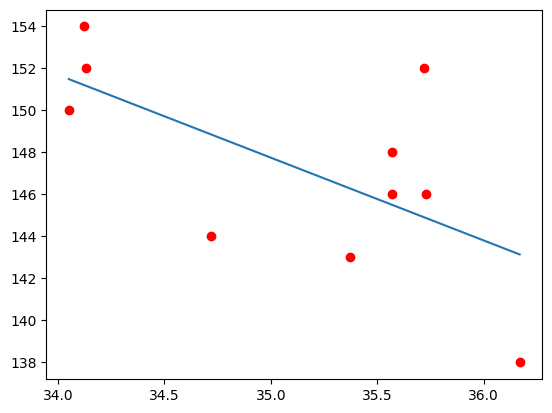

In [7]:
plt.scatter(x, y, color='red')
plt.plot(runner[['running_time']].to_numpy(), model.predict(x))
plt.show()

# a quantidade baixa de dados que tinha deu UNDERFITING
# não consegue me dar uma previsão adequada
# Quanto menor o tempo que a pessoa corre o batimento cardiáco aumenta (???) - NÃO FAZ SENTIDO!!!

In [8]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit() #OLS - MÍNIMOS QUADRADOS ORDINÁRIOS
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     5.357
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0493
Time:                        21:33:29   Log-Likelihood:                -26.992
No. Observations:                  10   AIC:                             57.98
Df Residuals:                       8   BIC:                             58.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        285.6079     59.769      4.779      0.001     147.780     423.436
x1            -3.9387      1.702     -2.315      0.049      -7.863      -0.015
==============================================================================
Omnibus:                        0.171   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.918   Jarque-Bera (JB):                0.241
Skew:                           0.225   Prob(JB):                        0.886
Kurtosis:                       2.386   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Vamos imaginar que eu tenha 1.000 OBSERVAÇÕES
# 1° - Dividir a minha amostra EM:
# 500 obs. para gerar o modelo e 500 obs para testar modelo

# VARIÁVEIS DUMMY

In [10]:
visits

# quantidade de visitantes que um condomínio recebeu por dia

,date,visits
0,2023-01-01,56
1,2023-01-02,52
2,2023-01-03,83
3,2023-01-04,84
4,2023-01-05,94
...,...,...
313,2023-11-10,155
314,2023-11-11,126
315,2023-11-12,67
316,2023-11-13,140


In [11]:
# transformar o campo de data QUE ERA UMA VARIÁVEL CATEGÓRICA
visits['date'] = pd.to_datetime(visits['date'])

visits['dow'] = visits['date'].dt.dayofweek
visits['mon'] = visits.apply(lambda row: 1 if row ['dow']==0 else 0, axis=1) # monday = segunda-feira
visits['tue'] = visits.apply(lambda row: 1 if row ['dow']==1 else 0, axis=1) # tuesday = terça-feira
visits['wed'] = visits.apply(lambda row: 1 if row ['dow']==2 else 0, axis=1) # wednesday = quarta-feira
visits['thu'] = visits.apply(lambda row: 1 if row ['dow']==3 else 0, axis=1) # thurday = quinta-feira
visits['fri'] = visits.apply(lambda row: 1 if row ['dow']==4 else 0, axis=1) # friday = sexta-feira
visits['sat'] = visits.apply(lambda row: 1 if row ['dow']==5 else 0, axis=1) # satuday = sábado
visits['sun'] = visits.apply(lambda row: 1 if row ['dow']==6 else 0, axis=1) # sunday = domingo
visits

,date,visits,dow,mon,tue,wed,thu,fri,sat,sun
0,2023-01-01,56,6,0,0,0,0,0,0,1
1,2023-01-02,52,0,1,0,0,0,0,0,0
2,2023-01-03,83,1,0,1,0,0,0,0,0
3,2023-01-04,84,2,0,0,1,0,0,0,0
4,2023-01-05,94,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
313,2023-11-10,155,4,0,0,0,0,1,0,0
314,2023-11-11,126,5,0,0,0,0,0,1,0
315,2023-11-12,67,6,0,0,0,0,0,0,1
316,2023-11-13,140,0,1,0,0,0,0,0,0


In [12]:
# modelo de regressão para prever quantidade de visitas em um dado dia

model = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)

In [13]:
x = visits[['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']].to_numpy()
y = visits['visits']
model.fit(x,y)

LinearRegression()

In [14]:
print(model.score(x, y))

0.4829963359546158


In [15]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

## Prever a quantidade de visitas
# y = 111 + 13*dom + 17*seg + 26*ter + 29*qua + 49*qui + 11*sex - 35*sab


                            OLS Regression Results                            
Dep. Variable:                 visits   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     51.99
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.81e-44
Time:                        21:33:29   Log-Likelihood:                -1465.4
No. Observations:                 318   AIC:                             2945.
Df Residuals:                     311   BIC:                             2971.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.1420      1.204     92.304      0.0

# OVERFITTING

In [16]:
imc

,imc,drugs,alcohol,tobacco,age,sex,ethnicity
0,26.00,no,no,no,69.0,Masculino,Parda
1,0.00,no,no,no,39.0,Masculino,Parda
2,28.00,no,no,no,73.0,Masculino,Branca
3,28.00,no,no,no,72.0,Masculino,Branca
4,39.00,no,no,no,39.0,Feminino,Branca
...,...,...,...,...,...,...,...
894,20.83,no,no,yes,45.0,Feminino,Negra
895,35.32,no,no,no,50.0,Feminino,Parda
896,22.21,no,no,no,32.0,Feminino,Branca
897,36.98,no,no,yes,74.0,Feminino,Branca


In [17]:
# tratar variáveis categóricas

#deleta se achar um valor nilo em qualquer coluna, a linha inteira
imc = imc.dropna(how='any', axis=0)
imc = imc.loc[imc['imc'] !=0]

#converter variávies categóricas para numéricas
imc['drugs'] = imc.apply(lambda row: 1 if row ['drugs']=='yes' else 0, axis=1)
imc['alcohol'] = imc.apply(lambda row: 1 if row ['alcohol']=='yes' else 0, axis=1)
imc['tobacco'] = imc.apply(lambda row: 1 if row ['tobacco']=='yes' else 0, axis=1)
imc['sex'] = imc.apply(lambda row: 1 if row ['sex']=='Masculino' else 0, axis=1)
imc['parda'] = imc.apply(lambda row: 1 if row ['ethnicity']=='Parda' else 0, axis=1)
imc['branca'] = imc.apply(lambda row: 1 if row ['ethnicity']=='Branca' else 0, axis=1)
imc['negra'] = imc.apply(lambda row: 1 if row ['ethnicity']=='Negra' else 0, axis=1)
imc['amarela'] = imc.apply(lambda row: 1 if row ['ethnicity']=='Amarela' else 0, axis=1)
imc

,imc,drugs,alcohol,tobacco,age,sex,ethnicity,parda,branca,negra,amarela
0,26.00,0,0,0,69.0,1,Parda,1,0,0,0
2,28.00,0,0,0,73.0,1,Branca,0,1,0,0
3,28.00,0,0,0,72.0,1,Branca,0,1,0,0
4,39.00,0,0,0,39.0,0,Branca,0,1,0,0
5,24.00,0,1,1,66.0,1,Branca,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
894,20.83,0,0,1,45.0,0,Negra,0,0,1,0
895,35.32,0,0,0,50.0,0,Parda,1,0,0,0
896,22.21,0,0,0,32.0,0,Branca,0,1,0,0
897,36.98,0,0,1,74.0,0,Branca,0,1,0,0


In [18]:
model = LinearRegression(n_jobs=None, fit_intercept=True, copy_X=True)

In [19]:
x = imc[['drugs','alcohol',	'tobacco',	'sex', 'parda',	'branca',	'negra',	'amarela']].to_numpy()
y = imc['imc'].to_numpy()
model.fit(x,y)
print(model.score(x, y))

0.043402902592130754


In [20]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.377
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           9.28e-05
Time:                        21:33:30   Log-Likelihood:                -2193.3
No. Observations:                 658   AIC:                             4403.
Df Residuals:                     650   BIC:                             4439.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1609      0.606     39.857      0.0